In [3]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
data_dir = Path('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp534-over/r1i1p1f1/Amon/tas/gn/v20200701')
files = sorted(data_dir.iterdir())
to_2100 = Path('/Volumes/LaCie/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp585/r1i1p1f1/Amon/tas/gn/v20200702/tas_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc')

In [6]:
overshoot = xr.open_mfdataset(files)
overshoot

/Users/jonniebarnsley/opt/anaconda3/envs/phd/lib/python3.11/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/jonniebarnsley/opt/anaconda3/envs/phd/lib/python3.11/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/jonniebarnsley/opt/anaconda3/envs/phd/lib/python3.11/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/jonniebarnsley/opt/anaconda3/envs/phd/lib/python3.11/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, nam

<xarray.Dataset> Size: 714MB
Dimensions:    (time: 3120, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 25kB 2040-01-15 12:00:00 ... 2299-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 690MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    time_bnds  (time, nbnd) object 50kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (time, lat, nbnd) float64 10MB dask.array<chunksize=(600, 192, 2), meta=np.ndarray>
    lon_bnds   (time, lon, nbnd) float64 14MB dask.array<chunksize=(600, 288, 2), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   744235.0
    branch_time_in_parent:  744235.0
    case_id:                52
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/72635b93-1231-4828-8d52-037843d3bad6
    variable_id:            tas
    variant_info:           CMIP6 CESM2 future scenario SSP5-3.4 OS between 2...
    variant_label:          r1i1p1f1

In [7]:
to_2100_data = xr.open_dataset(to_2100)
to_2100_data

/Users/jonniebarnsley/opt/anaconda3/envs/phd/lib/python3.11/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 228MB
Dimensions:    (time: 1032, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 8kB 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 228MB ...
    time_bnds  (time, nbnd) object 17kB ...
    lat_bnds   (lat, nbnd) float32 2kB ...
    lon_bnds   (lon, nbnd) float32 2kB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    case_id:                43
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/8e986dfa-cd3a-45a4-9e3b-9cb67433b6ab
    variable_id:            tas
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1

In [12]:
to_2040 = to_2100_data.sel(time=slice('2015-01-01', '2039-12-30'))

In [22]:
means = [
    to_2040.sel(lat = slice(-90, -60)).mean(dim=['lat', 'lon']).groupby('time.year').mean(dim='time'),
    overshoot.sel(lat = slice(-90, -60)).mean(dim=['lat', 'lon']).groupby('time.year').mean(dim='time')
]

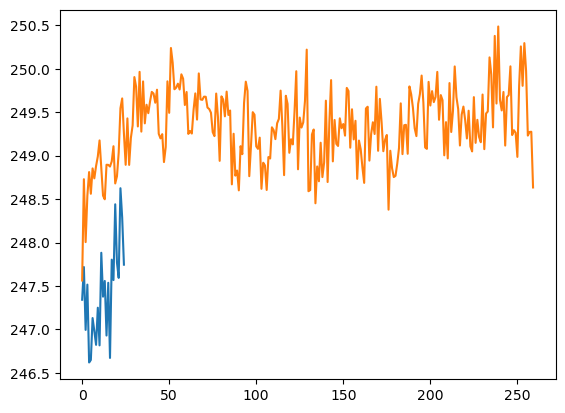

In [23]:
plt.plot(means[0].tas)
plt.plot(means[1].tas)